In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [244]:
def showData(X_1, Y_1, X_2, Y_2):
    plt.scatter(X_1, Y_1, color = 'r');
    plt.scatter(X_2, Y_2, color = 'g');
    plt.title('Data');
    plt.show()

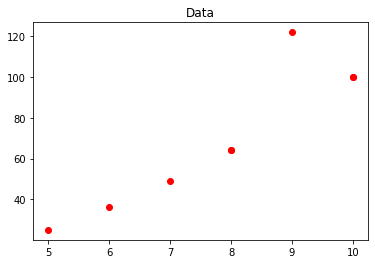

In [245]:
X = []
y = []

X.append(5)
X.append(10)
X.append(10)
X.append(9)
X.append(8)
X.append(8)
X.append(6)
X.append(7)

y.append(25)
y.append(100)
y.append(100)
y.append(122)
y.append(64)
y.append(64)
y.append(36)
y.append(49)


showData(X, y, None, None)

In [246]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, information_gain=None, value=None):
        
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.information_gain = information_gain
        
        self.value = value

In [247]:
from numpy.core.multiarray import concatenate
class DecisionTreeRegressor():
    def __init__(self, min_samples_split, max_depth):
        self.root = None

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    
    def build_tree(self, data, current_depth=0):
        X, y = data[:, :-1], data[:, -1]

        num_samples, num_features = X.shape
        # 6 and 1
        best_split = {}
        if num_samples >= self.min_samples_split and current_depth <= self.max_depth:
            best_split = self.get_best_split(data, num_samples, num_features)
            if best_split['information_gain'] > 0:

                # threshold_data.append(best_split['threshold'])
                print('current_feature - ',best_split['current_feature'])
                print('threshold - ', best_split['threshold'])
                print('data_left - ', best_split['data_left'])
                print('data_right - ', best_split['data_right']) 
                print('information_gain - ', best_split['information_gain'])
                print('current_depth - ', current_depth)
                print('--------')
                print()

                left_subtree = self.build_tree(best_split['data_left'], current_depth + 1)
                right_subtree = self.build_tree(best_split['data_right'], current_depth + 1)

                # return Node(best_split["current_feature"], best_split["threshold"], 
                #             left_subtree, right_subtree, best_split["var_red"]), threshold_data
                
        leaf_value =  np.mean(y)
        
        return Node(leaf_value)

    def get_best_split(self, data, num_samples, num_features):

        best_split = {}
        max_gain = -float("inf")

        for current_feature in range(0, num_features):
            feature_values = data[:, current_feature]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                data_left, data_right = self.split(data, current_feature, threshold)
                if len(data_left) > 0 and len(data_right) > 0:
                    y, y_left, y_right = data[:, -1], data_left[:, -1], data_right[:, -1]
                    current_gain = self.compute_information_gain(y, y_left, y_right)
                    if current_gain > max_gain:
                        best_split['current_feature'] = current_feature
                        best_split['threshold'] = threshold
                        best_split['data_left'] = data_left
                        best_split['data_right'] = data_right
                        best_split['information_gain'] = current_gain
                        max_var_red = current_gain

        return best_split    


    def split(self, data, current_feature, threshold):
        data_left = np.array([row for row in data if row[current_feature] <= threshold])
        data_right = np.array([row for row in data if row[current_feature] > threshold])
        return data_left, data_right

    def compute_information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)

        parent = self.MSE(parent)
        left_child = self.MSE(left_child)
        right_child = self.MSE(right_child)
        var_red = parent - weight_left * left_child - weight_right * right_child

        return var_red
        
    def MSE(self, y):
        average_y = y.mean()
        sum = 0
        for i in range(len(y)):
            sum += (y[i] - average_y) ** 2 / len(y)
        return sum


    def fit(self, X, y):
        data = pd.DataFrame({'features': X, 'targets': y})
        data = np.array(data)
        self.root = self.build_tree(data)
        # threshold_data = np.unique(np.sort(threshold_data))
        # return threshold_data
    

In [248]:
X = pd.Series(X)
y = pd.Series(y)

In [249]:
Tree = DecisionTreeRegressor(min_samples_split = 3, max_depth = 6)
Tree.fit(X, y)

current_feature -  0
threshold -  9
data_left -  [[  5  25]
 [  9 122]
 [  8  64]
 [  8  64]
 [  6  36]
 [  7  49]]
data_right -  [[ 10 100]
 [ 10 100]]
information_gain -  300.0000000000001
current_depth -  0
--------

current_feature -  0
threshold -  8
data_left -  [[ 5 25]
 [ 8 64]
 [ 8 64]
 [ 6 36]
 [ 7 49]]
data_right -  [[  9 122]]
information_gain -  768.7999999999997
current_depth -  1
--------

current_feature -  0
threshold -  7
data_left -  [[ 5 25]
 [ 6 36]
 [ 7 49]]
data_right -  [[ 8 64]
 [ 8 64]]
information_gain -  179.30666666666667
current_depth -  2
--------

current_feature -  0
threshold -  6
data_left -  [[ 5 25]
 [ 6 36]]
data_right -  [[ 7 49]]
information_gain -  76.05555555555557
current_depth -  3
--------

